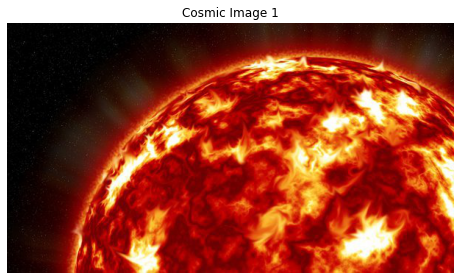

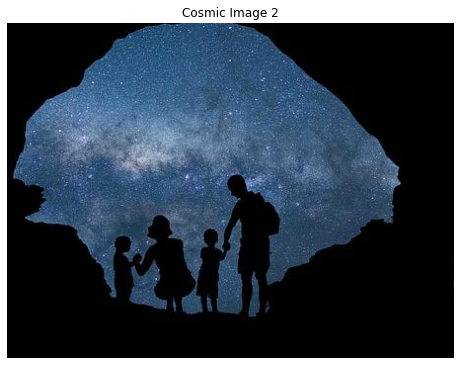

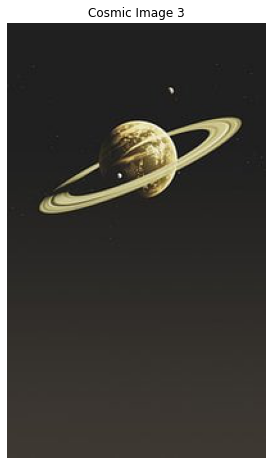

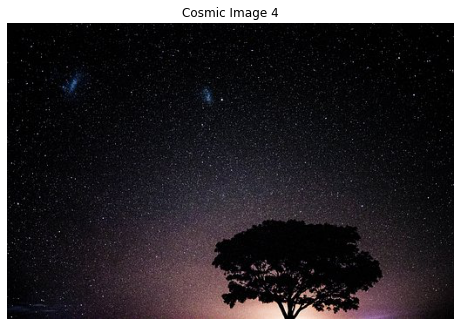

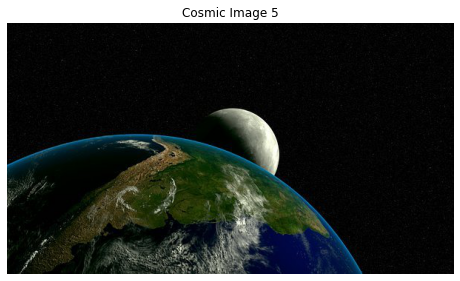

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Path to the directory containing your cosmic image dataset
dataset_dir = "data/img_align_celeba/"

# List all JPG files in the dataset directory
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]

# Load and display the first few images
num_images_to_display = 5

for i in range(num_images_to_display):
    image_path = os.path.join(dataset_dir, image_files[i])
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Cosmic Image {i+1}')
    plt.show()


In [2]:
# from PIL import Image
# import os

# # Path to the directory containing your cosmic image dataset
# dataset_dir = "data/img_align_celeba/"

# # Output directory to save resized images
# output_dir = "data/img_align_celeba2/"

# # Target size for resizing
# target_size = (256, 256)  # Adjust the size as needed

# # List all image files in the dataset directory
# image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]

# # Resize and save images
# for image_file in image_files:
#     image_path = os.path.join(dataset_dir, image_file)
#     image = Image.open(image_path)
    
#     # Convert RGBA image to RGB
#     if image.mode == 'LA' or image.mode == 'RGBA':
#         image = image.convert('RGB')
    
#     # Resize image
#     resized_image = image.resize(target_size)
    
#     # Save resized image
#     output_path = os.path.join(output_dir, image_file)
#     resized_image.save(output_path)


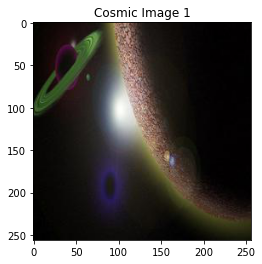

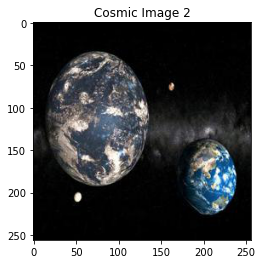

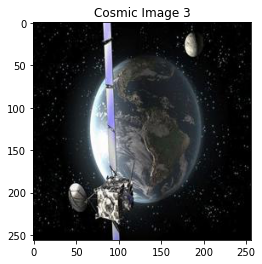

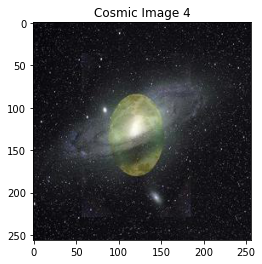

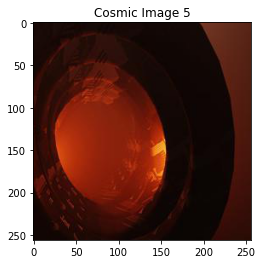

In [3]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Path to the directory containing your cosmic image dataset
dataset_dir = "data/img_align_celeba2/"

# List all JPG files in the dataset directory
image_files = [f for f in os.listdir(dataset_dir) if f.endswith('.jpg')]

# Load and display the first few images
num_images_to_display = 5

for i in range(num_images_to_display):
    image_path = os.path.join(dataset_dir, image_files[i+10])
    image = Image.open(image_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    #plt.axis('off')
    plt.title(f'Cosmic Image {i+1}')
    plt.show()


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# Function to load and preprocess images from JPG files
def load_images(directory, target_size=(256, 256)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = tf.keras.preprocessing.image.load_img(
                os.path.join(directory, filename),
                target_size=target_size
            )
            img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
            images.append(img)
    return np.array(images)

# Load images from directory
dataset_directory = "data/img_align_celeba2/"
image_data = load_images(dataset_directory)

In [5]:
# learning_rates = [0.0001, 0.0005, 0.001]
# batch_sizes = [16, 32, 64]
# num_epochs = 10
# for lr in learning_rates:
#     for batch_size in batch_sizes:
#         print(f"Training with learning rate: {lr}, batch size: {batch_size}")
        
#         # Build and compile GAN model with current hyperparameters
#         generator = build_generator(input_shape)
#         discriminator = build_discriminator((256, 256, 3))
#         gan = GAN(generator, discriminator)
#         gan.compile(
#             d_optimizer=tf.keras.optimizers.Adam(lr, beta_1=0.5),
#             g_optimizer=tf.keras.optimizers.Adam(lr, beta_1=0.5),
#             loss_fn=tf.keras.losses.BinaryCrossentropy(),
#         )
        
#         # Train GAN model
#         gan.fit(image_data, epochs=num_epochs, batch_size=batch_size, verbose=1)
        
#         # Evaluate the trained model (e.g., FID score, visual inspection)
#         evaluation_results = evaluate_model(gan, test_dataset)
        
#         # Record the performance of the model
#         record_results(lr, batch_size, evaluation_results)


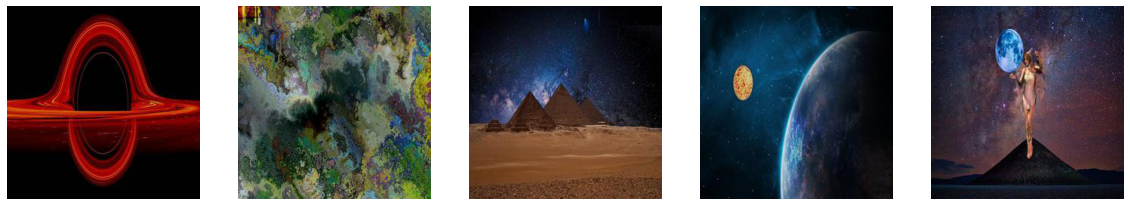

In [99]:
import matplotlib.pyplot as plt
num_images_to_generate = 5
# Assuming generated_images contains the vector representations of generated images
# Rescale pixel values to [0, 255] and convert to integer
real_images = image_data[np.random.randint(0, image_data.shape[0], 5)]


# Plot the generated images
plt.figure(figsize=(20, 20))
for i in range(real_images.shape[0]):
    plt.subplot(1, real_images.shape[0], i + 1)
    plt.imshow(real_images[i])
    plt.axis('off')
plt.show()


In [26]:
real_images.shape

(10, 256, 256, 3)

In [105]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


# Function to build the generator model
def build_generator(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Dense(64 * 64 * 64, input_shape=input_shape))
    model.add(layers.Reshape((64, 64, 64)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), activation='sigmoid', padding='same'))
    return model

# Function to build the discriminator model
def build_discriminator(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define hyperparameters
LATENT_DIM = 100
num_epochs = 500
batch_size = 64

# Build generator and discriminator models
input_shape = (LATENT_DIM,)
generator = build_generator(input_shape)
discriminator = build_discriminator((256, 256, 3))

# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combine generator and discriminator to form GAN
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(LATENT_DIM,))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train GAN model
for epoch in range(num_epochs):
    noise = np.random.normal(size=(batch_size, LATENT_DIM))
    generated_images = generator.predict(noise)
    real_images = image_data[np.random.randint(0, image_data.shape[0], batch_size)]

    # For training GAN, label real images as 1 and fake images as 0
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Train discriminator on real images
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)

    # Train discriminator on fake images
    d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

    # Train generator (via the GAN model)
    noise = np.random.normal(size=(batch_size, LATENT_DIM))
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs} - Discriminator Loss: {0.5 * np.add(d_loss_real, d_loss_fake)} - Generator Loss: {g_loss}")




2/2 [==============================] - 4s 2s/step
Epoch 1/500 - Discriminator Loss: [8.55222869e+01 7.81250000e-02] - Generator Loss: 3.052968140671588e-21
2/2 [==============================] - 4s 2s/step
Epoch 2/500 - Discriminator Loss: [6.13016462 0.5       ] - Generator Loss: 1.3975837154234227e-10
2/2 [==============================] - 4s 2s/step
Epoch 3/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.08326728641986847
2/2 [==============================] - 4s 2s/step
Epoch 4/500 - Discriminator Loss: [0. 1.] - Generator Loss: 1.649607780017231e-19
2/2 [==============================] - 4s 2s/step
Epoch 5/500 - Discriminator Loss: [0.5613746 0.9921875] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 6/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 7/500 - Discriminator Loss: [8.250256e-31 1.000000e+00] - Generator Loss: 0.0
2/2 [==============================] - 5s 2s/step
Epoch 8

2/2 [==============================] - 4s 2s/step
Epoch 63/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 64/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 65/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 66/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 67/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 68/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 69/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 70/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 71/500 - Discriminator L

Epoch 132/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 133/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 134/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 135/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 136/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 137/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 138/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 139/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 140/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [=

2/2 [==============================] - 4s 2s/step
Epoch 202/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 203/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 3s 2s/step
Epoch 204/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 2s 1s/step
Epoch 205/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 2s 1s/step
Epoch 206/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 2s 1s/step
Epoch 207/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 3s 1s/step
Epoch 208/500 - Discriminator Loss: [4.49459087e-21 1.00000000e+00] - Generator Loss: 0.0
2/2 [==============================] - 3s 1s/step
Epoch 209/500 - Discriminator Loss: [1.07398296e-38 1.00000000e+00] - Generator Loss: 0.0
2/2 [===================

2/2 [==============================] - 5s 2s/step
Epoch 269/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 270/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 271/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 272/500 - Discriminator Loss: [3.13001738e-06 1.00000000e+00] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 273/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 274/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 275/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 276/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/ste

2/2 [==============================] - 4s 2s/step
Epoch 338/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 339/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 340/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 341/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 342/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 343/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 344/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 345/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 346/500 - Discri

2/2 [==============================] - 4s 2s/step
Epoch 408/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 409/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 410/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 411/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 412/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 413/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 414/500 - Discriminator Loss: [1.1941461e-36 1.0000000e+00] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 415/500 - Discriminator Loss: [2.4634107e-17 1.0000000e+00] - Generator Loss: 0.0
2/2 [=======================

2/2 [==============================] - 3s 2s/step
Epoch 478/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 479/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 480/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 481/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 3s 2s/step
Epoch 482/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 4s 2s/step
Epoch 483/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 3s 2s/step
Epoch 484/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 3s 2s/step
Epoch 485/500 - Discriminator Loss: [0. 1.] - Generator Loss: 0.0
2/2 [==============================] - 3s 2s/step
Epoch 486/500 - Discri

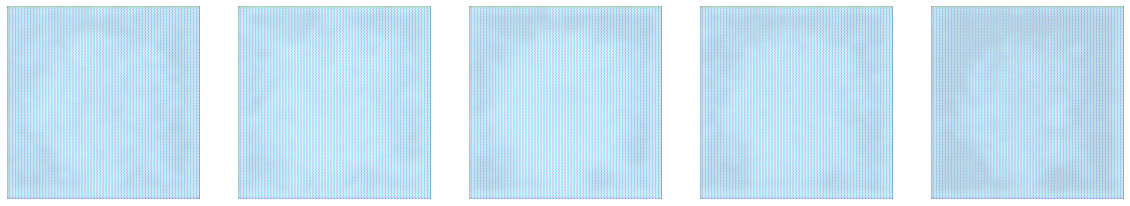

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'generator' is your trained generator model

# Define the number of images you want to generate
num_images_to_generate = 5

# Generate random noise as input for the generator
random_noise = tf.random.normal(shape=(num_images_to_generate, LATENT_DIM))

# Generate images using the generator model
generated_images = generator(random_noise, training=True)

# Plot the generated images
plt.figure(figsize=(20, 20))
for i in range(num_images_to_generate):
    plt.subplot(1, num_images_to_generate, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.show()

In [103]:
import tensorflow as tf

# Assuming 'generator' is your trained generator model

# Specify the file path where you want to save the generator model
model_path = 'generator_model.h5'

# Save the generator model to an HDF5 file
generator.save(model_path)

print("Generator model saved at:", model_path)


Generator model saved at: generator_model.h5


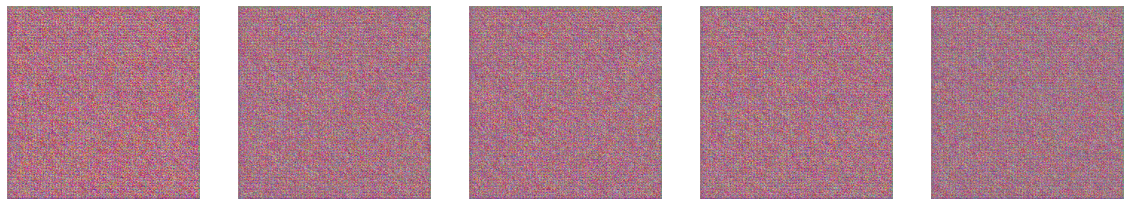

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the trained generator model
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('generator_model.h5')


# # Compile the model with appropriate hyperparameters
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss=tf.keras.losses.BinaryCrossentropy(),
#               metrics=[tf.keras.metrics.BinaryAccuracy(), 
#                        tf.keras.metrics.Precision(), 
#                        tf.keras.metrics.Recall()])

# Define the number of images you want to generate
num_images_to_generate = 5

# Generate random noise as input for the generator
latent_dim = 100  # Assuming latent dimensionality is 100
random_noise = tf.random.normal(shape=(num_images_to_generate, latent_dim))

# Generate images using the generator model
generated_images = model(random_noise, training=True)

# Plot the generated images
plt.figure(figsize=(20, 20))
for i in range(num_images_to_generate):
    plt.subplot(1, num_images_to_generate, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.show()


# Increase the depth of Layers

In [91]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Function to build the generator model
def build_generator(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Dense(64 * 64 * 64, input_shape=input_shape))
    model.add(layers.Reshape((64, 64, 64)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), activation='sigmoid', padding='same'))
    return model

# Function to build the discriminator model
def build_discriminator(input_shape):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Load your image dataset (replace this with your dataset loading code)
# Example: image_data = load_image_dataset()

# Define hyperparameters
LATENT_DIM = 100
input_shape = (256, 256, 3)  # Adjust this according to your image data shape
num_epochs = 10
batch_size = 64

# Build generator and discriminator models
generator = build_generator((LATENT_DIM,))
discriminator = build_discriminator(input_shape)

# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Combined GAN model
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(LATENT_DIM,))
gan_output = discriminator(generator(gan_input))
gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


# Train GAN model
for epoch in range(num_epochs):
    noise = np.random.normal(size=(batch_size, LATENT_DIM))
    generated_images = generator.predict(noise)
    real_images = image_data[np.random.randint(0, image_data.shape[0], batch_size)]

    # For training GAN, label real images as 1 and fake images as 0
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Train discriminator on real images
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)

    # Train discriminator on fake images
    d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)

    # Train generator (via the GAN model)
    noise = np.random.normal(size=(batch_size, LATENT_DIM))
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress
    print(f"Epoch {epoch+1}/{num_epochs} - Discriminator Loss: {0.5 * np.add(d_loss_real, d_loss_fake)} - Generator Loss: {g_loss}")



2/2 [==============================] - 5s 2s/step
Epoch 1/10 - Discriminator Loss: [8.2885492e+01 1.5625000e-02] - Generator Loss: 3.269168482777415e-19
2/2 [==============================] - 4s 2s/step
Epoch 2/10 - Discriminator Loss: [0.07980964 1.        ] - Generator Loss: 3.7357172476965017e-13
2/2 [==============================] - 4s 2s/step
Epoch 3/10 - Discriminator Loss: [5.89202192e-27 1.00000000e+00] - Generator Loss: 2.946336767904777e-15
2/2 [==============================] - 4s 2s/step
Epoch 4/10 - Discriminator Loss: [0. 1.] - Generator Loss: 3.842520517185906e-22
2/2 [==============================] - 4s 2s/step
Epoch 5/10 - Discriminator Loss: [4.73077577e-38 1.00000000e+00] - Generator Loss: 5.6272904450699975e-30
2/2 [==============================] - 4s 2s/step
Epoch 6/10 - Discriminator Loss: [1.28408761e-29 1.00000000e+00] - Generator Loss: 3.600763619562403e-36
2/2 [==============================] - 4s 2s/step
Epoch 7/10 - Discriminator Loss: [3.81425336e-19 1.0

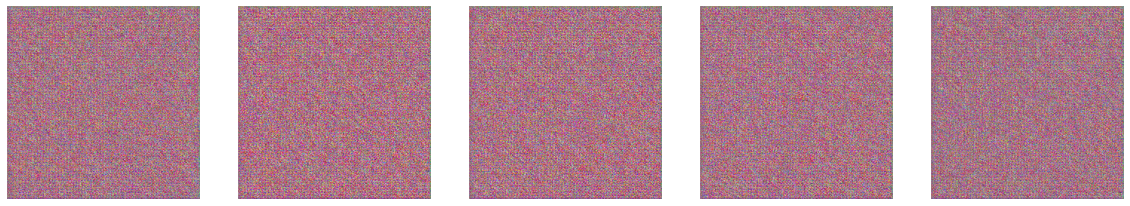

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming 'generator' is your trained generator model

# Define the number of images you want to generate
num_images_to_generate = 5

# Generate random noise as input for the generator
random_noise = tf.random.normal(shape=(num_images_to_generate, LATENT_DIM))

# Generate images using the generator model
generated_images = generator(random_noise, training=True)

# Plot the generated images
plt.figure(figsize=(20, 20))
for i in range(num_images_to_generate):
    plt.subplot(1, num_images_to_generate, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')
plt.show()